<h1>Проектная работа по теме: «Принятие решений в бизнесе»</h>

<b>Описание проекта</b></br>

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br><br>
<b>Задача:</b> Необходимо приоритизировать гипотезы. <br> В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина<br> с указанными параметрами: <b> Reach, Impact, Confidence, Effort</b>.


<h2>Приоритизация гипотез.</h2>




<b>Описание данных</b>


<ul><li><code class="code-inline code-inline_theme_light">Hypothesis</code> — краткое описание гипотезы;</li><li><code class="code-inline code-inline_theme_light">Reach</code> — охват пользователей по 10-балльной шкале;</li><li><code class="code-inline code-inline_theme_light">Impact</code> — влияние на пользователей по 10-балльной шкале;</li><li><code class="code-inline code-inline_theme_light">Confidence</code> — уверенность в гипотезе по 10-балльной шкале;</li><li><code class="code-inline code-inline_theme_light">Efforts</code> — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение <code class="code-inline code-inline_theme_light">Efforts</code>, тем дороже проверка гипотезы.</li></ul>


In [58]:
#Импортирую библиотеку 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats 

In [59]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')
print(df.head(5)) 

                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [61]:
display(df)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [62]:
#Привожу заголовки к нижнему регистру 
df.columns = map(str.lower, df.columns)
df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [63]:
#Раскрываю строки таблицы, чтобы прочитать формулировки гипотез целиком 
pd.options.display.max_colwidth = 150
df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<h3>Применение фреймворка ICE для приоритизации гипотез.<br> Сортировка их по убыванию приоритета.</h3>

In [64]:
df['ICE'] = ( df['impact'] * df['confidence']) / df['efforts']
df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<b>Вывод</b><br> 
Самыми важными гипотезами методом приоритизации ICE оказались
<li>Запустить акцию, дающую скидку на товар в день рождения</li>
<li>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей</li>
<li>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок</li>



<h3>Применение фреймворка RICE для приоритизации гипотез.<br> Сортировка их по убыванию приоритета.</h3>

In [65]:
# Вычисляем значение rICE и соритруем от большего к меньшему по значению ICE 
df['RICE'] = (df['reach']*df['impact']*df['confidence'])/df['efforts']
df_new = df.sort_values(by = 'RICE', ascending = False)
df_new[['hypothesis', 'RICE']].head(10)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Вывод</b><br> 
Самыми важными гипотезами методом приоритизации RICE оказались
<li>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок</li>
<li>Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа</li>
<li>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей</li>
<br><br>

Видим, что сбор данных для рассылке по приоритету оказалось выше, по сравнению с предыдущей приоритезацией
На это повлияло значение «reach» охват аудитории, в приоритезации RICE – это важный параметр


<h2>Анализ A/B-теста</h>

<div class="paragraph">Во второй части проекта  проведи A/B-тест и получили результаты,<br> которые описаны в файлах <code class="code-inline code-inline_theme_light">/datasets/orders.csv</code>.</div>
<ul><li><code class="code-inline code-inline_theme_light">transactionId</code> — идентификатор заказа;</li><li><code class="code-inline code-inline_theme_light">visitorId</code> — идентификатор пользователя, совершившего заказ;</li><li><code class="code-inline code-inline_theme_light">date</code> — дата, когда был совершён заказ;</li><li><code class="code-inline code-inline_theme_light">revenue</code> — выручка заказа;</li><li><code class="code-inline code-inline_theme_light">group</code> — группа A/B-теста, в которую попал заказ.</li></ul>

<div class="paragraph"><code class="code-inline code-inline_theme_light">/datasets/visitors.csv</code>.</div>


<ul><li><code class="code-inline code-inline_theme_light">date</code> — дата;</li><li><code class="code-inline code-inline_theme_light">group</code> — группа A/B-теста;</li><li><code class="code-inline code-inline_theme_light">visitors</code> — количество пользователей в указанную дату в указанной группе A/B-теста</li></ul>
<div class="paragraph"><strong>Задача</strong></div>
<div class="paragraph">Проанализировать A/B-тест</div>

<h3>Построение графика кумулятивной выручки по группам. Сделайте выводы и предположения.</h3>

In [66]:
#Прочитаю файл orders и переведу тип данных дат
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [67]:
#Проверим, есть ли пользователи, которые попали в обе группы
duplicates_users = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
duplicates_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [68]:
#Удалим пользователей, которые попали в обе группы
orders = orders[~orders['visitorId'].isin(duplicates_users)]

In [69]:
#Проверяем
np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

array([], dtype=int64)

Видим, что такие кипользователи все очищены 

In [70]:
#Прочитаю файл visitors и переведу тип данных дат
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(visitors.head(5)) 


        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [71]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [72]:
visitors.duplicated().sum()

0

In [73]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [74]:
orders.duplicated().sum()

0

In [75]:
#Видим, что дубликатов и пропусков в выборках нет 

In [76]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [77]:
#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max',
      'group' : 'max',
      'transactionId' : 'nunique',
      'visitorId' : 'nunique',
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [78]:
#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max',
                                             'group' : 'max',
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [79]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
#Переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


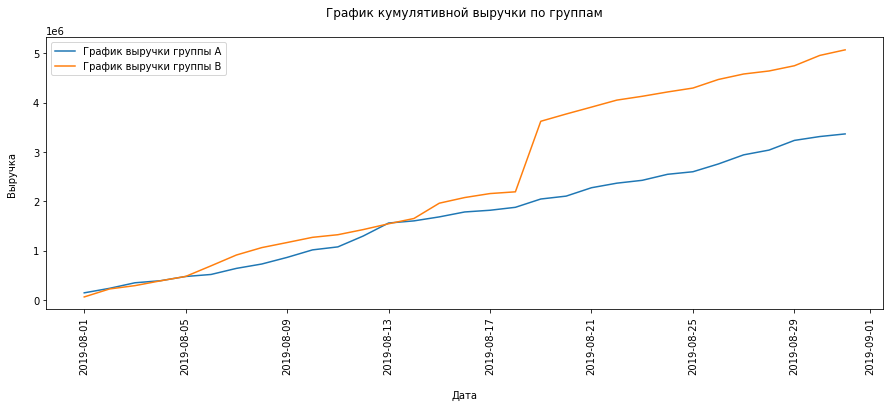

In [80]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='График выручки группы A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='График выручки группы B')
plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
# Поворачиваем значение дат на 90 градусов для удобства 
plt.xticks(rotation=90)
plt.legend() 
plt.show()

Видим,что 19.08.2019 - 20.08.2019 числах, наблюдается резкий скачок B теста. <br>
Возможно имеют место аномально большое количество заказов или аномально высокий средний чек. 

<h3>Построение графика кумулятивного среднего чека по группам.</h3>

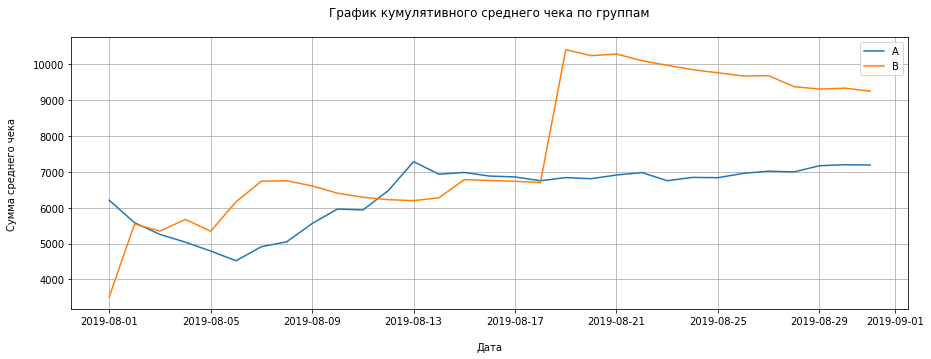

In [81]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Сумма среднего чека\n')
plt.legend() 
plt.show()

Комулятивное значение среднего чека по сегментам нестабильно.<br> Возможно имеются аномальные значения (выбросы), которые искажают общую картину.

<h3>
Построение графика относительного изменения кумулятивного среднего чека<br> группы B к группе A.</h3>

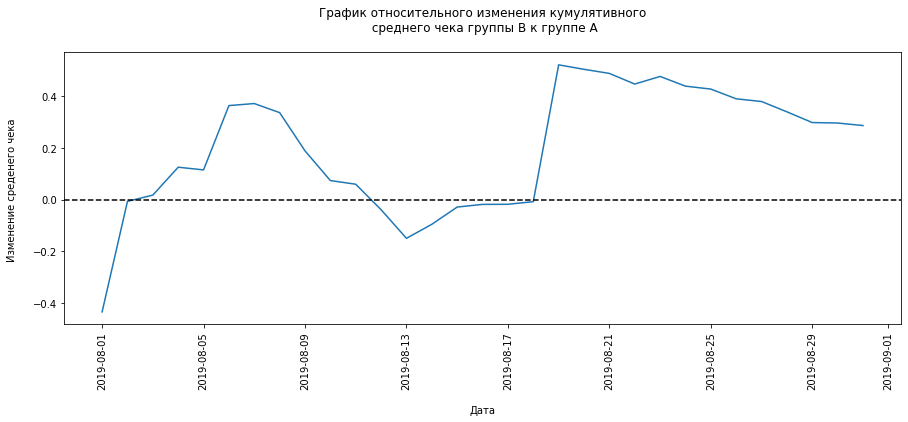

In [82]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90)
plt.title('График относительного изменения кумулятивного\n среднего чека группы B к группе A\n')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Глядя на график относительного различия в среднем чеке между группами, видим как сильно меняются значения в определенные даты. <br>Веротяно, тогда и были совершены аномальные заказы.

<h3>Построение графика кумулятивного среднего количества заказов по группам. </h3>

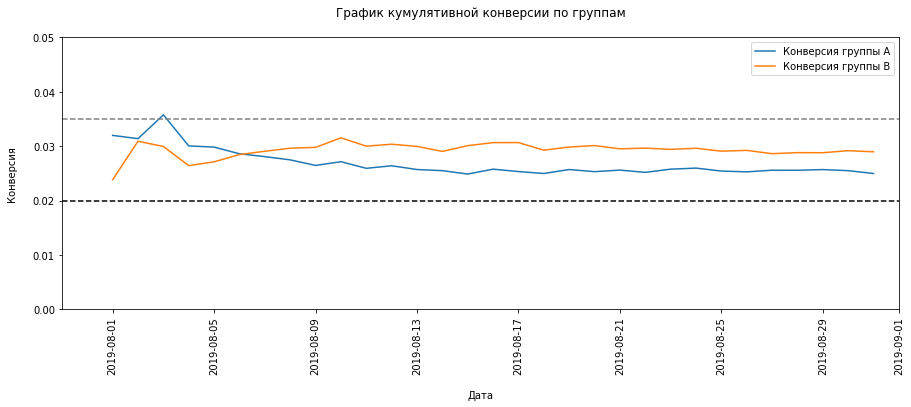

In [83]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Конверсия группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Конверсия группы B')
plt.axhline(y=0.02, color='black', linestyle='--')
plt.axhline(y=0.035, color='grey', linestyle='--')
plt.legend()
plt.title('График кумулятивной конверсии по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Конверсия\n')
plt.xticks(rotation=90)
plt.ylim(0.025, 0.04)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 7, 30), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

Сначала сегмент А имел большую конверсию, но 7 августа сегмент В выровнялся и зафиксировался больше значения сегмента А.

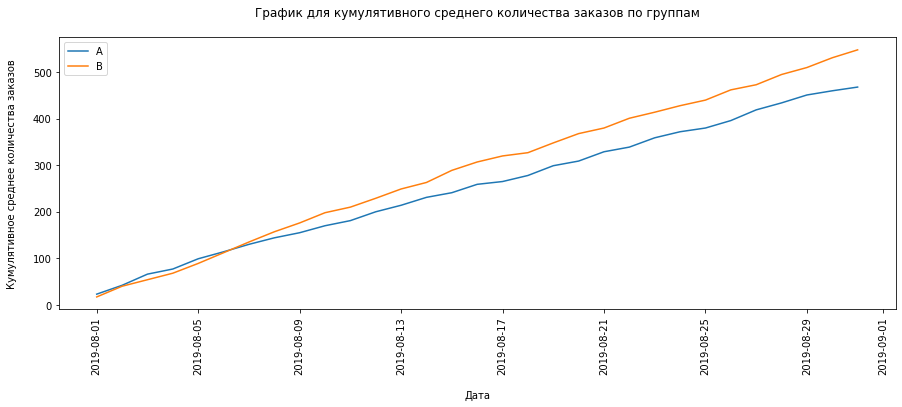

In [84]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')


plt.legend() 
plt.title('График для кумулятивного среднего количества заказов по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Кумулятивное среднее количества заказов\n')
plt.xticks(rotation=90)
# задаем масштаб осей
plt.show()

Видим, что 7 августа  у В-теста количество заказов обгоняет А-тест

<h3>Построение графика относительного изменения кумулятивной конверсии группы B к группе A.</h3>

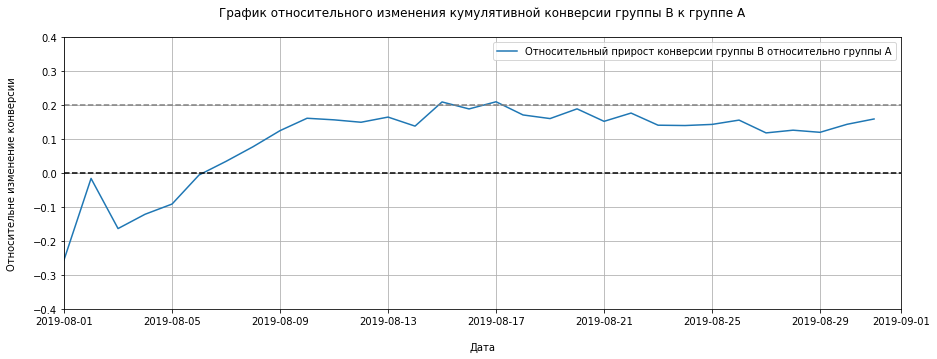

In [85]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Относительне изменение конверсии\n');

С 5-ого августа группа В лидирует по конверсии. Приняла стабильные +15% относительно группы А.

<h3>Построение точечного графика количества заказов по пользователям.</h3>

In [86]:
#Посмотрим сколько заказов делали пользователи
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['transactionId', 'visitorId']
print(ordersByUsers.sort_values(by='visitorId', ascending=False).head(10)) 



     transactionId  visitorId
908     3967698036          3
55       249864742          3
478     2108163459          3
687     2988190573          3
890     3908431265          3
138      611059232          3
632     2742574263          3
157      678354126          2
323     1404560065          2
452     1985475298          2


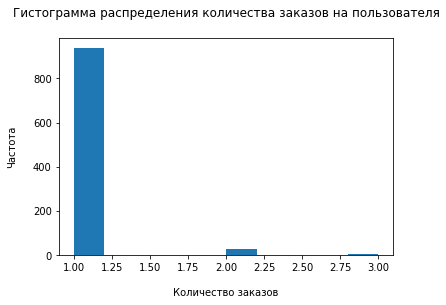

In [87]:
#Построим гистрограмму 
plt.hist(ordersByUsers['visitorId']) 
plt.title('Гистограмма распределения количества заказов на пользователя\n  ')
plt.xlabel('\nКоличество заказов')
plt.ylabel('Частота\n');

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-5 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя:

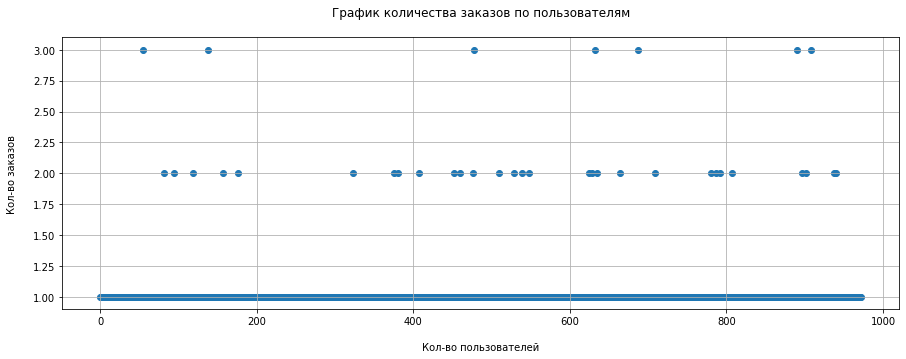

In [88]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['visitorId']);

Выводы подтверждаются: много пользователей с 1-2 заказами. <br> Совершившие 3 заказа, возможно будут являться выбросами.

<h3>Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.</h3>

In [89]:
#Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
#Введем значеня процентилий стоимости заказов количества заказов на пользователя
#p95_visitorId - 95 процентиль
#p99_visitorId - 99 процентиль
 
p95_visitorId, p99_visitorId = np.percentile(ordersByUsers['visitorId'], [95, 99])



In [90]:
p95_visitorId


1.0

In [91]:
p99_visitorId

2.0

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 


<h3>Построение точечного графика стоимостей заказов.</h3>

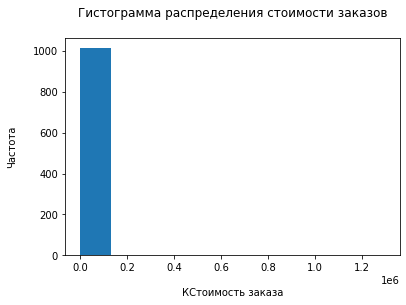

In [92]:
#Строю гистограмму 
plt.hist(orders['revenue']) 
plt.title('Гистограмма распределения стоимости заказов\n  ')
plt.xlabel('\nКСтоимость заказа')
plt.ylabel('Частота\n');

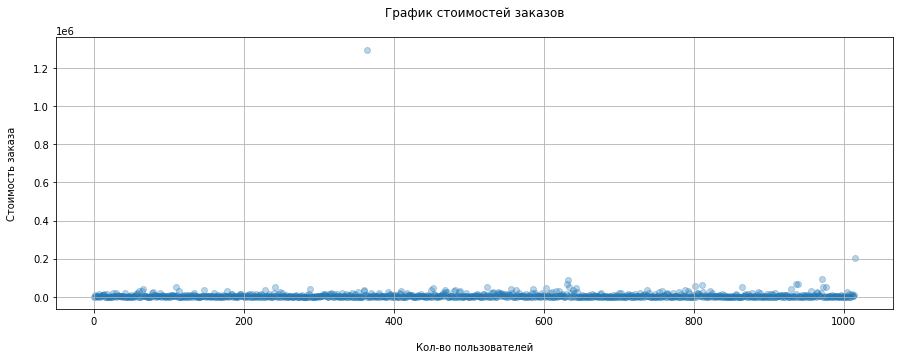

In [93]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов\n ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(x_values, orders['revenue'], alpha=0.3);

График не очень нагляный из-за наличия двух аномальных значений.
Посмотрим поближе, для это уберем очевидные выбросы с 'revenue' большим 200000

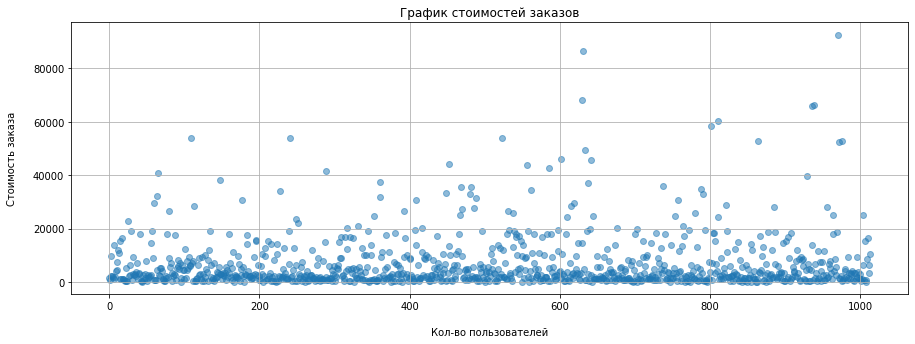

In [94]:
norm_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(xn_values, norm_orders, alpha=0.5);

Большая часть всех заказов не дороже 20000.

<h3>Посчитаем 95-й и 99-й перцентили стоимости заказов.</h3>

In [95]:
#Введем значеня процентилий стоимости заказов
#p95_revenue - 95 процентиль
#p99_revenue - 99 процентиль
p95_revenue, p99_revenue = np.percentile(orders['revenue'], [95, 99])

In [96]:
p99_revenue

53904.0

In [97]:
p95_revenue

26785.0

Не более 5% пользователей покупали больше 26785. <br>И 1% пользователей покупали  более 53904
Разумно взять как верхнюю границу значение  26785 руб.

<h3>Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.</h3>

Поготовка данных

In [101]:
visitors[visitors['group'] == 'A']['visitors'].sum()

18736

In [ ]:
#Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [ ]:
# Группровка пользователей которые заказывали хотябы один раз.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Применим проверка данных на нормальность критерием Шапиро-Уилка <br>– это нужно для того, чтобы выяснить какой статистический критерий выбрать в будущем<br>
Если наше распределение нормально, то можно будет использовать критерий T-test Сьюдента,<br> если распределение не нормально, то нужно использовать критерий Манна-Уитни 

In [ ]:
from scipy import stats as st
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(ordersByUsersA)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

Далее будем применять  критерий Манна-Уитни, так как наше распределение ненормально
В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо. Да, они учитывают все значения. Но в этом также их слабое место: одно выбивающееся значение существенно влияет на результат.


Объявим переменные sampleA и sampleB,<br>
в которых пользователям из разных групп будет соответствовать количество заказов.<br>
Тем, кто ничего не заказал, будут соответствовать нули.<br>





In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<b>Нулевая гипотеза H0</b> – выборки групп различий в среднем количестве заказов между группами нет.<br>
<b>Альтернативная гипотеза Н1</b> – различия в среднем между группами есть.<br>
<b>Alpha</b> = 0.05



In [ ]:

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Группа B относительно группы А  {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


По «сырым» данным различий в среднем числе заказов групп A и B нет.<br>
Первое число — p-value = 0.011 меньше 0.05. <br>
Значит, можно отвергнуть нулевую гипотезу о том, что статистически значимых различий <br>
в среднем числе заказов между группами нет. <br>
Выигрыш  среднем числе заказов группы B относительно группы А равен 16% 

<h3>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</h3>

In [ ]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('B относительно группы А {0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать,
что в среднем чеке есть различия, нет. <br> Cредний чек группы B значительно выше среднего чека группы A на 29%

<h3>Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.</h3>

In [ ]:
p95_visitorId, p99_visitorId = np.percentile(ordersByUsers['visitorId'], [95, 99])
p95_revenue, p99_revenue = np.percentile(orders['revenue'], [95, 99])

In [ ]:
p95_visitorId

In [ ]:
p99_visitorId

In [ ]:
p95_revenue

In [ ]:
p99_revenue

Напомню. По среднему чеку разумно взять как верхнюю границу значение 28000 руб.<br>
По количеству заказов верхнее значение 2 заказа



In [ ]:
#Узнаем, сколько всего аномальных пользователей

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > p99_visitorId]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > p99_visitorId]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > p95_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

#print(np.percentile(ordersByUsers['visitorId'], [95, 99])) 
#print(np.percentile(orders['revenue'], [95, 99])) 

In [ ]:
t=np.percentile(ordersByUsers['visitorId'], [95, 99])

В наших данных 58 аномальных пользователей

In [ ]:
print('Доля аномальных пользователей', (abnormalUsers.shape[0]/ordersByUsers['transactionId'].nunique())*100, 'процентов')

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<b>Нулевая гипотеза H0</b> – различий в среднем количестве заказов между группами нет.<br>
<b>Альтернативная гипотеза Н1</b> – различия в среднем между группами есть.<br>
<b>Alpha</b> = 0.05

In [ ]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('B относительно группы А {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value = 0.009 меньше 0.05.<br>
Значит, можно отвергнуть нулевую гипотезу о том, что статистически значимых различий<br>
в среднем числе заказов между группами нет.<br>
Выигрыш в среднем числе заказов группы B относительно группы А равен 19% – это больше на 3%  чем с сырыми данными (16%)

<h3>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. </h3>

In [ ]:
print(
    'p-value {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "B относительно группы А {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


Значение P-value значительно увеличилось до 76%. <br> По прежнему не отвергаем нулевую гипотезу что, а среднем чеке есть различия.<br>
Значение  средного чека группы B относительно группы А равен стало хуже на 2%. <br>
По сравнению с сырыми данными было выявлено паденьне среднего чека на 28% <br>– так сильно повлияли высокие средние чеки. 
Следовательно можно сделать вывод, <br> что В тест ухудшает ситуацию в целом.


<b>Вывод</b><br> 
В ходе исследования, было выяснено:<br> 
По данным различий в среднем числе заказов B - тест  относительно группы А - теста сработал лучше на  16% по чистым даным и 19% с сырыми данными <br>
По среднему чеку B - тест  относительно группы А - теста сработал лучше на 29% по сырым данным  и упал на 2% с чистыми данными. <br>
По сравнению с сырыми данными было выявлено паденьне среднего чека на 31%<br><br>

<b>Рекомендация для отдела маркетинга</b><br>
Можно остановить тест и считать, что граппа B - теста победила группу А теста,<br> но нужно взять во внимание падение среднего чека у очищенных данных.



